In [1]:
#Importar bibliotecas necesarias
import pandas as pd

In [2]:
import seaborn as sns

DATOS RELEVANTES DE MARATONES INTERNACIONALES EN LOS ULTIMOS AÑOS

In [3]:
#Importar el archivo fuente
df = pd.read_csv('C:/Users/ASUS-72937/Documents/curso-py/parte 1/TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\ASUS-72937\AppData\Local\Temp\ipykernel_15084\2071337632.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/ASUS-72937/Documents/curso-py/parte 1/TWO_CENTURIES_OF_UM_RACES.csv')


In [4]:
#Muestreo de los datos
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


Limpieza de datos para un evento en especifo

In [6]:
#Crear una nueva tabla apartir de seleccionar un evento en especifico
df_event = df[df['Event name']== 'Everglades 50 Mile Ultra Run (USA)']

In [7]:
#Agregar una columna
df_event['athlete_age'] = 2020 - df_event['Athlete year of birth']


C:\Users\ASUS-72937\AppData\Local\Temp\ipykernel_15084\3314783891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event['athlete_age'] = 2020 - df_event['Athlete year of birth']


In [13]:
#Editar el tipo de dato de la nueva columna
df_event['athlete_age'] = df_event['athlete_age'].astype(int)

In [8]:
#Elminar la palabra 'USA' de la columna 'Event name'
df_event['Event name'] = df_event['Event name'].str.split('(').str.get(0)

C:\Users\ASUS-72937\AppData\Local\Temp\ipykernel_15084\2587054714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event['Event name'] = df_event['Event name'].str.split('(').str.get(0)


In [9]:
#Eliminar columnas no necesarias para el analisis : 
df_event = df_event.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)

In [10]:
#Descubrir si hay valores nulos
df_event.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
athlete_age                  0
dtype: int64

In [11]:
#Chechar si hay valores duplicados
df_event[df_event.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [12]:
#Reiniciar la numeracion del indice
df_event.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,7:00:00 h,M,11.495,47601,40.0
1,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,8:29:48 h,M,9.47,37220,31.0
2,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,8:45:31 h,M,9.187,47602,41.0
3,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,9:01:52 h,M,8.91,47603,53.0
4,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,9:26:06 h,M,8.529,47604,34.0
...,...,...,...,...,...,...,...,...,...,...
333,2015,21.02.2015,Everglades 50 Mile Ultra Run,50mi,67,13:24:08 h,M,6.004,198009,52.0
334,2015,21.02.2015,Everglades 50 Mile Ultra Run,50mi,67,13:24:08 h,F,6.004,198010,46.0
335,2015,21.02.2015,Everglades 50 Mile Ultra Run,50mi,67,13:40:57 h,F,5.881,361182,48.0
336,2015,21.02.2015,Everglades 50 Mile Ultra Run,50mi,67,13:55:09 h,M,5.781,1560327,60.0


In [14]:
df_event.dtypes

Year of event                 int64
Event dates                  object
Event name                   object
Event distance/length        object
Event number of finishers     int64
Athlete performance          object
Athlete gender               object
Athlete average speed        object
Athlete ID                    int64
athlete_age                   int32
dtype: object

In [ ]:
#Cambiar el tipo de dato de otro valor
df_event['Athlete average speed'] = df_event['Athlete average speed'].astype(float)

In [15]:
#Renombrar columnas
df_event = df_event.rename(columns= { 'Year of event' : 'Year',
                                     'Event dates' : 'Race_day',
                                     'Event name' : 'Race_name',
                                     'Event distance/length' : 'Race_length',
                                     'Event number of finishers' : 'Race_number_of_finishers',
                                     'Athlete performance' : 'Athlete_performance',
                                     'Athlete gender' : 'Athlete_gender',
                                     'Athlete average speed' : 'Athlete_average_speed',
                                     'Athlete ID' : 'Athlete_id' 
                                     })


In [16]:
df_event.head()

,Year,Race_day,Race_name,Race_length,Race_number_of_finishers,Athlete_performance,Athlete_gender,Athlete_average_speed,Athlete_id,athlete_age
51923,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,7:00:00 h,M,11.495,47601,40
51924,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,8:29:48 h,M,9.47,37220,31
51925,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,8:45:31 h,M,9.187,47602,41
51926,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,9:01:52 h,M,8.91,47603,53
51927,2018,17.02.2018,Everglades 50 Mile Ultra Run,50mi,23,9:26:06 h,M,8.529,47604,34


In [20]:
#Reordernar las columnas
df_event1 = df_event[['Race_day', 'Race_name', 'Race_length', 'Race_number_of_finishers', 'Athlete_id', 'Athlete_gender', 'athlete_age', 'Athlete_performance', 'Athlete_average_speed', 'Year']]

Informacion relevante a partir del archivo original

In [ ]:
#Combinar datos : 50 km con 50 mi en el año 2020 | Usando isin
df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020)]

In [22]:
#Crear nueva tabla para encontrar carreras en el año 2020 
df_event_2020 = df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020)]


In [43]:
#Añadir una ueva columna
df_event_2020['Athlete_age'] = 2020 - df_event_2020['Athlete year of birth']

C:\Users\ASUS-72937\AppData\Local\Temp\ipykernel_15084\696413955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_2020['Athlete_age'] = 2020 - df_event_2020['Athlete year of birth']


In [44]:
df_event_2020.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_age
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107,55.0
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785,46.0
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502,44.0
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964,51.0
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485,56.0


In [25]:
#Carrera en especifco del 2020
df_event_2020[df_event_2020['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2591476,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,8:31:39 h,"*Miami Beach, FL",USA,1993.0,M,M23,9.436,820757
2591477,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,8:31:48 h,"*Miami, FL",USA,1981.0,M,M35,9.433,46432
2591478,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,8:34:43 h,"*Cambridge, MA",USA,1986.0,M,M23,9.38,813617
2591479,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:07:35 h,"*Bonita Springs, FL",USA,1987.0,M,M23,8.817,820758
2591480,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:15:32 h,"*Miami, FL",USA,1990.0,M,M23,8.691,647115
2591481,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:18:05 h,"*Boynton Beach, FL",USA,1994.0,M,M23,8.651,696063
2591482,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:19:10 h,"*Dunedin, FL",USA,1997.0,M,MU23,8.634,222509
2591483,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:20:51 h,"*Miami, FL",USA,1984.0,M,M35,8.608,820759
2591484,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:26:15 h,"*New York, NY",USA,1994.0,F,W23,8.526,359359
2591485,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:26:16 h,"*Lakewood Ranch, FL",USA,1978.0,M,M40,8.526,103020


In [26]:
#Numero de corredor en especifico
df_event_2020[df_event_2020['Athlete ID'] == 222509]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2591482,2020,14.03.2020,Everglades 50 Mile Ultra Run (USA),50mi,40,9:19:10 h,"*Dunedin, FL",USA,1997.0,M,MU23,8.634,222509
2616900,2020,22.02.2020,Manasota Track Club 50K (USA),50km,36,4:49:16 h,NaN,USA,1997.0,M,MU23,10.371,222509


<Axes: xlabel='Event distance/length', ylabel='Count'>

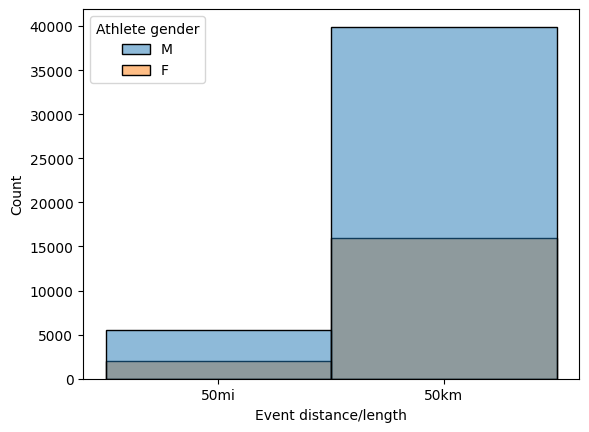

In [29]:
#Grafica de competidores por distancia y deacuerdo al genero
sns.histplot(df_event_2020, x = 'Event distance/length', hue = 'Athlete gender' )

In [37]:
#Cmabiar el tipo de dato de velocidad para graficar
df_event_2020['Athlete average speed'] = df_event_2020['Athlete average speed'].astype(float)

C:\Users\ASUS-72937\AppData\Local\Temp\ipykernel_15084\48032044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_2020['Athlete average speed'] = df_event_2020['Athlete average speed'].astype(float)


<Axes: xlabel='Event distance/length', ylabel='Athlete average speed'>

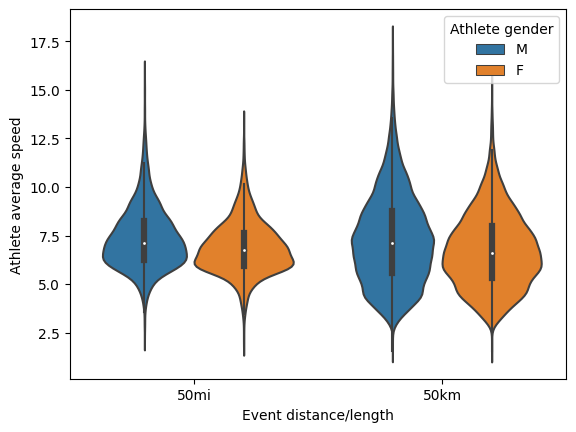

In [38]:
#Grafica de velocidad promedio por género
sns.violinplot(data = df_event_2020, x = 'Event distance/length', y = 'Athlete average speed', hue = 'Athlete gender')

c:\Users\ASUS-72937\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


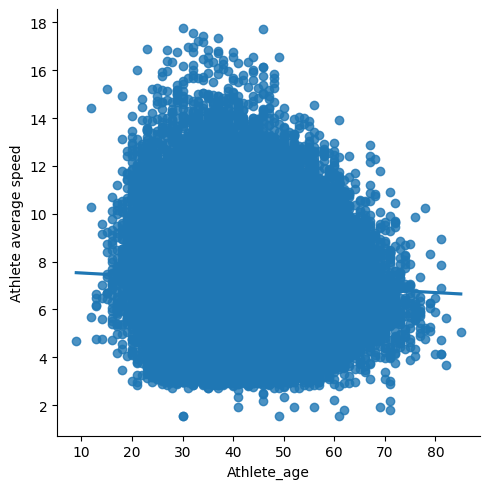

In [46]:
#Distribucion de la velocidad de los participantes en relacion a su edad
sns.lmplot(data = df_event_2020, x = 'Athlete_age', y = 'Athlete average speed' )

In [41]:
#Diferencia en velocidad promedio entre hombres y mujeres para 50km y 50 mi
df_event_2020.groupby(['Event distance/length', 'Athlete gender' ])['Athlete average speed'].mean()

Event distance/length  Athlete gender
50km                   F                 6.737871
                       M                 7.285058
50mi                   F                 6.882499
                       M                 7.367648
Name: Athlete average speed, dtype: float64